In [1]:
import glob
import os.path

import import_ipynb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from helpful_functions import *
from streakimage2.streakimage import FileType, StreakImage

importing Jupyter notebook from helpful_functions.ipynb


In [2]:
bg_dict = {
    "bg_ST4_g20_20x556ms": StreakImage(
        "./local_files/20200313 1002 bg_ST4_g20_sl60_L475_20x0,5.img"
    ),
    "bg_ST4_g30_20x556ms": StreakImage("./local_files/bg_g30_20x0,5s_sp60.img"),
    "bg_ST4_g40_20x5004ms": StreakImage(
        "./local_files/20200313 1003 bg_ST4_g20_sl60_L475_20x5.img"
    ),
}

In [3]:
img_dict = {
    "1-0": StreakImage(
        "./local_files/20200313 1100 J36 TET-F4_1-0_10K_05mW_OD0,3_FF495x2_ST4_g20_sl60_L475_20x0,5.img",
        bg_dict=bg_dict,
        title="TET-F4 1-0 10K J36",
    ),
    "1-1": StreakImage(
        "./local_files/20200316 301 J34 TET-F4_1-1_10K_05mW_OD0,3_FF495x2_ST4_g30_sl60_L475_20x0,5.img",
        bg_dict=bg_dict,
        title="TET-F4 1-1 10K J34",
    ),
    "2-1": StreakImage(
        "./local_files/20200316 301 J33 TET-F4_2-1_10K_05mW_OD0,3_FF495x2_ST4_g30_sl60_L475_20x0,5.img",
        bg_dict=bg_dict,
        title="TET-F4 2-1 10K J33",
    ),
    #     "1-3": StreakImage(
    #         "./local_files/20200317 301 J35 TET-F4_1-3_10K_05mW_OD0,3_FF495x2_ST4_g40_sl60_L475_20x5.img",
    # #         bg_dict=bg_dict,
    #         title="TET-F4 1-3 10K J35",
    #     ),
    #     "3-1": StreakImage(
    #         "./local_files/20200317 601 J23 TET-F4_3-1_10K_05mW_OD0,3_FF495x2_ST4_g20_sl60_L475_20x0,5.img",
    # #         bg_dict=bg_dict,
    #         title="TET-F4 3-1 10K J23",
    #     ),
}

In [4]:
temp_dict = {}
temps = [
    10,
    20,
    30,
    40,
    50,
    60,
    80,
    120,
    160,
    200,
    240,
    280,
]
num = -1
for temp in temps:
    num += 1

    path = glob.glob(f"./local_files/20200313 11* J36 TET-F4_1-0_{temp}K_05mW_OD0,3_FF495x2_ST4_g20_sl60_L475_20x0,5.img")[0]
    img = StreakImage(
        path,
        bg_dict=bg_dict,
        title=f"TET-F4 1-0 {temp:0>3}K J36",
    )

    offset = img.data.iloc[:10].mean().mean()
    img.data -= offset
    img.apply_gain_correction()
    img.apply_exp_correction()
    img.apply_camera_correction()

    path = os.path.join(
        os.getcwd(), f"./local_files/glotaran_readable_temp-1-0/{img.title}.ascii"
    )
    img.export_texf(path)
    temp_dict[temp] = img

1-0
1-1
2-1


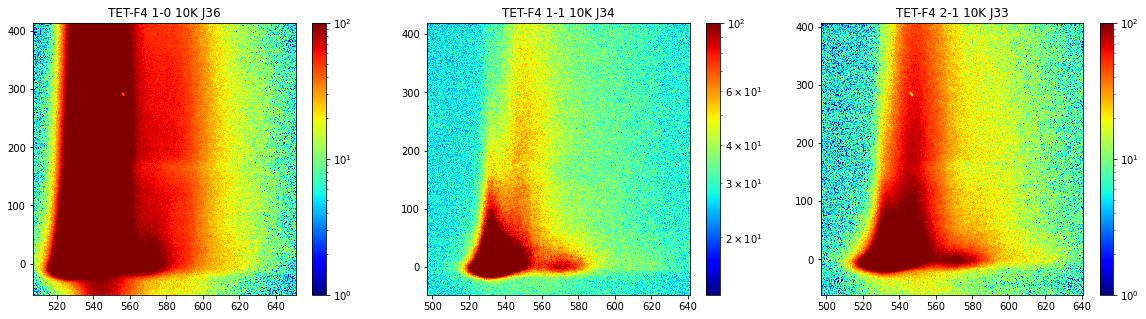

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# axes_list = [ax for row in axes for ax in row]
# axes_iter = iter(axes_list)
axes_iter = iter(axes)

for key in img_dict:
    img = img_dict[key]
    print(key)
    print(img)
    ax = next(axes_iter)
    plot_heatmap(df=img.data, fig=fig, ax=ax, title=img.title, vmax=100)
# plot_heatmap(df=bg_dict['bg_ST4_g40_20x5004ms'].data, fig=fig, ax=next(axes_iter), title=img.title)

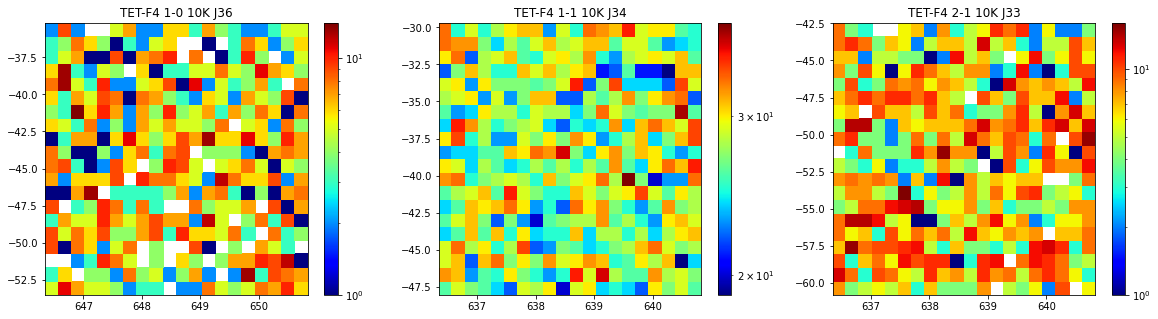

In [5]:
wl_from = None
wl_to = None
col_from = -20
col_to = None

time_from = None
time_to = None
line_from = None
line_to = 20

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes_iter = iter(axes)

for key in img_dict:
    img = img_dict[key]
    data_subset = img.data.loc[time_from:time_to, wl_from:wl_to].iloc[
        line_from:line_to, col_from:col_to
    ]
    ax = next(axes_iter)
    plot_heatmap(df=data_subset, fig=fig, ax=ax, title=img.title)
    offset = data_subset.mean().mean()
    img.data -= offset

In [6]:
for key in img_dict:
    img_dict[key].apply_gain_correction()
    img_dict[key].apply_exp_correction()
    img_dict[key].apply_camera_correction()

In [7]:
for key in img_dict:
    path = os.path.join(
        os.getcwd(), f"./local_files/glotaran_readable/{img_dict[key].title}.ascii"
    )
    img_dict[key].export_texf(path)